In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from math import gamma
gamma_u = np.frompyfunc(gamma, 1, 1)

In [2]:
k=12
Vmin=1.81
emacro=0.637
V0=4.0*np.pi/3.0*emacro
#Vs=np.pi/6.0
def f1(x): #
   #if x <= 0: return np.exp(-x)
    #return Vs*k**k/gamma_u(k)*(Vs*(x+1)-Vmin)**(k-1)/(V0-Vmin)**k*np.exp((-k*(Vs*(x+1)-Vmin)/(V0-Vmin)))
    #return 24.0/np.pi*np.sin(2.0*x)*np.cos(2.0*x)*k**k/gamma_u(k)*((np.sin(2.0*x))**2-Vmin)**(k-1)/(V0-Vmin)**k*np.exp((-k*(np.sin(2.0*x))**2-Vmin)/(V0-Vmin))
    return 32.0*np.sin(2.0*x)*np.cos(2.0*x)*k**k/gamma_u(k)*(8*(np.sin(2.0*x))**2-4.0*np.pi/3.0-Vmin)**(k-1)/(V0-Vmin)**k*np.exp((-k*(8*(np.sin(2.0*x))**2-4.0*np.pi/3.0-Vmin)/(V0-Vmin)))


In [3]:
D50=187.0
D84=230.0
lnsigma=np.log(D84/D50)
lnD50=np.log(D50)/np.exp(3*(lnsigma)**2)
print(lnsigma)
print(lnD50)
def g(R): #
    return 1/(2*np.sqrt(2*np.pi)*lnsigma*R)*np.exp(-1/2*(np.log(R)-lnD50)**2/lnsigma**2)

0.20697069206860877
4.600259091360345


In [4]:
Vv1= lambda R, x: (8*(np.sin(2.0*x))**2-4.0/3.0*np.pi)*R**3*f1(x)*g(R)
Vtotal1=integrate.dblquad(Vv1, np.pi/6.0, np.pi/4.0, lambda x: 0, lambda x: 10000)
print(Vtotal)
T=72.0 #(kN/um)

def Vsat_total(s) :
    return integrate.dblquad(Vv1, np.pi/6.0, np.pi/4.0, lambda x: 0, lambda x: 2*T*np.cos(x)/((1-np.cos(x))*s))


(1593560.3057361115, 0.00878509992902284)


In [5]:
title='new f k='+str(k)+',e='+str(emacro)+',g D50='+str(int(D50))+',D84='+str(int(D84))
#title='test'
print(title)

new f k=12,e=0.637,g D50=187,D84=230


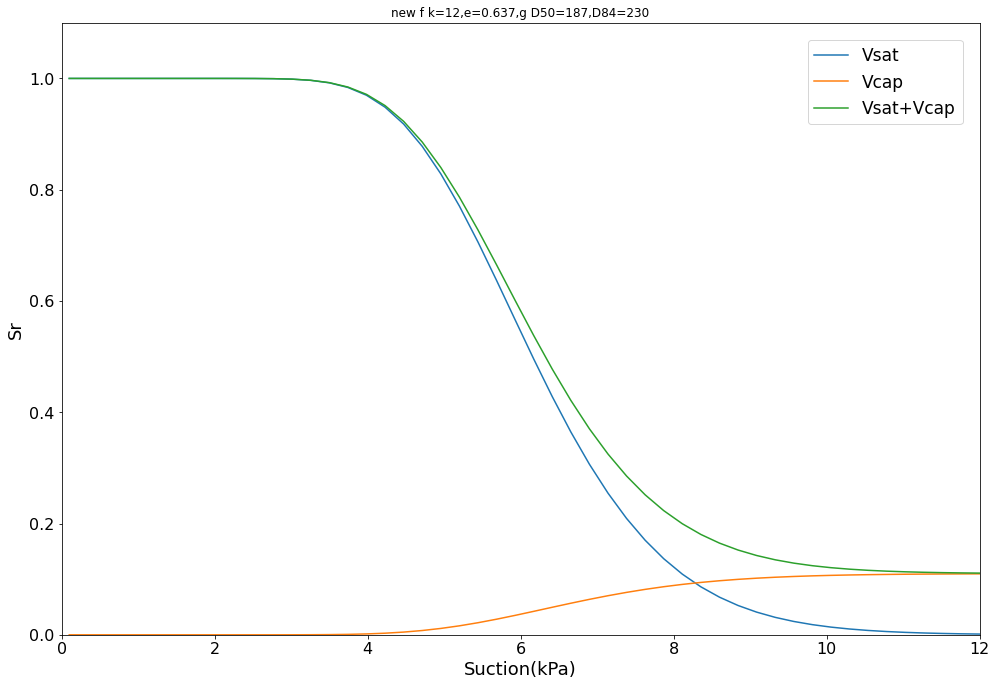

In [8]:
N = 50
smin = 0.1 #(kPa)
smax = 12.0 #(kPa)
p = np.linspace(smin, smax, N)
s=p[k]
Vcap= lambda R, x: 3.0*2.0*np.pi*R*T**2/s**2*(1-np.arcsin(s*R/(T+s*R))*(np.sqrt(T**2+2.0*T*s*R))/(s*R))*f(x)*g(R)
def Vcap_total(s) :
    return integrate.dblquad(Vcap, np.pi/6.0, np.pi/4.0, lambda x: 2*T*np.cos(x)/((1-np.cos(x))*s), lambda x: 10000)
def Srsat(s):
    return Vsat_total(s)[0]/float(Vtotal[0])
def Srcap(s):
    return Vcap_total(s)[0]/float(Vtotal[0])
def Srsatcap(s):
    return (Vsat_total(s)[0]+Vcap_total(s)[0])/float(Vtotal[0])
plt.figure(figsize=(15,10)) #, facecolor="white"

plt.xlabel("Suction(kPa)", fontsize=18)
plt.ylabel("Sr", fontsize=18)
plt.title(title)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0,1.1)
plt.xlim(0,smax)
plt.plot( p, [Srsat(p[k]) for k in range(N)],label='Vsat')
plt.plot( p, [Srcap(p[k]) for k in range(N)],label='Vcap')
plt.plot( p, [Srsatcap(p[k]) for k in range(N)],label='Vsat+Vcap')

plt.legend()
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=17)
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)
plt.savefig(title+".png",transparent=True) #,facecolor="white"